The purpose of this notebook is to explore PANCAN TCGA gene expression data.

# Librairies

In [25]:
import os
import sys
code_path = os.path.split(os.path.split(os.getcwd())[0])[0]
sys.path.append(code_path)
import json
from setting import *
from download_data import *
from dataset import *
from plots_and_stats import *
from utils import *
from loader import *

set_pyplot()

# Path

In [26]:
name = 'pancan'
save_path = get_save_path(name, code_path)
data_path = get_data_path(name)

# Dataset

In [27]:
X, y, class_name, feat_name = load_data(data_path, name)

# What is the unit used for the gene expression?

The unit of gene expression is probably raw count (*count*) divided by the 75th percentile of each individual sample and multiplied by 1000 (*count_uq*). As the 75th percentile of each individual sample is around 1000, it seems to make sense. 

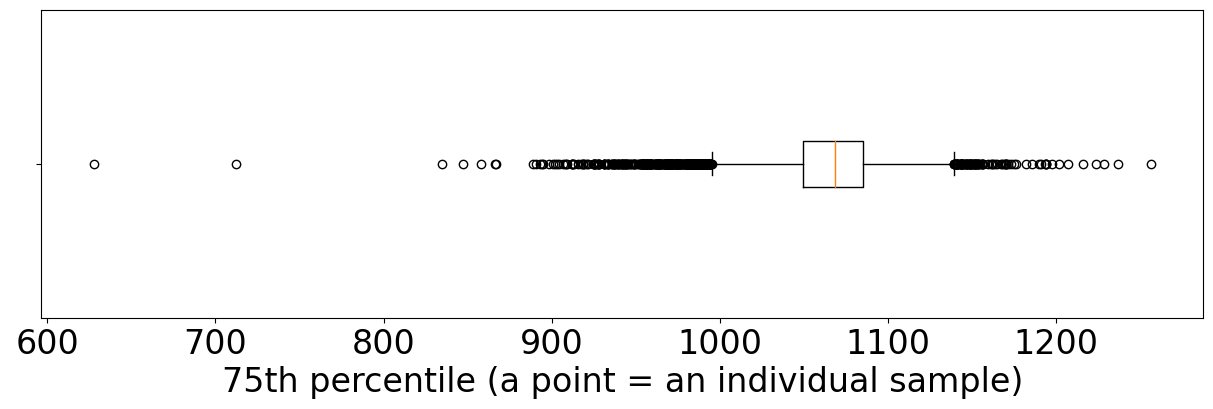

In [28]:
percentile = np.percentile(X, 75, axis=1)
plt.figure(figsize=(15, 4))
plt.boxplot(percentile, vert=False)
plt.yticks(color='w')
plt.xlabel('75th percentile (a point = an individual sample)')
plt.show()

In our work, each sample is expressed in log2(count_uq+1).

In [29]:
X = np.log2(X + 1 - np.min(X))  # the minimum of X is -0.98
unit = 'log2(count+1)'

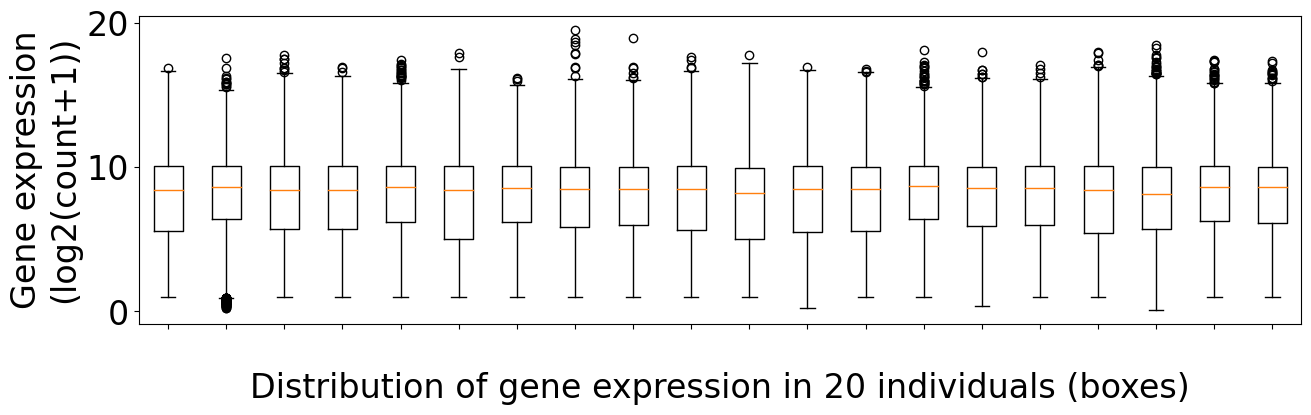

In [30]:
ylabel = f'Gene expression\n({unit})'
describe_random_individuals(X, ylabel)

# Distribution of the values of gene expression

Mean:  1197.13
Median:  364.37
Max:  7092440.98
Min:  0.0
Number of times the expression of a gene is equal to 0: 1


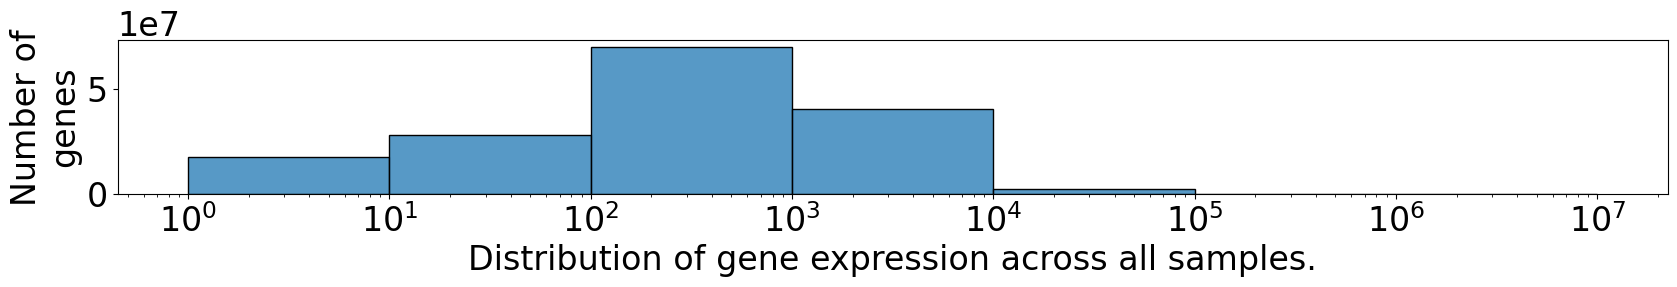

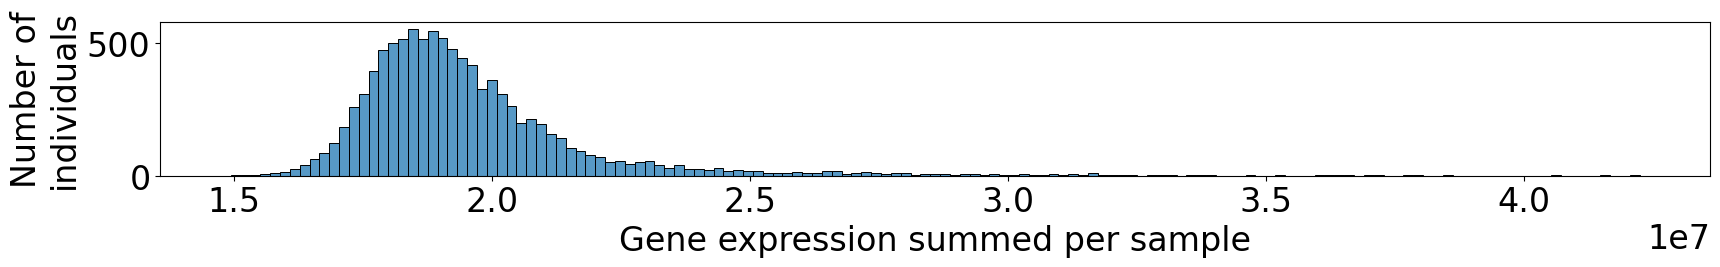

In [31]:
describe_gene_expression(2**X - 1, log_scale=False)

There are 0 genes whose average expression is 0.


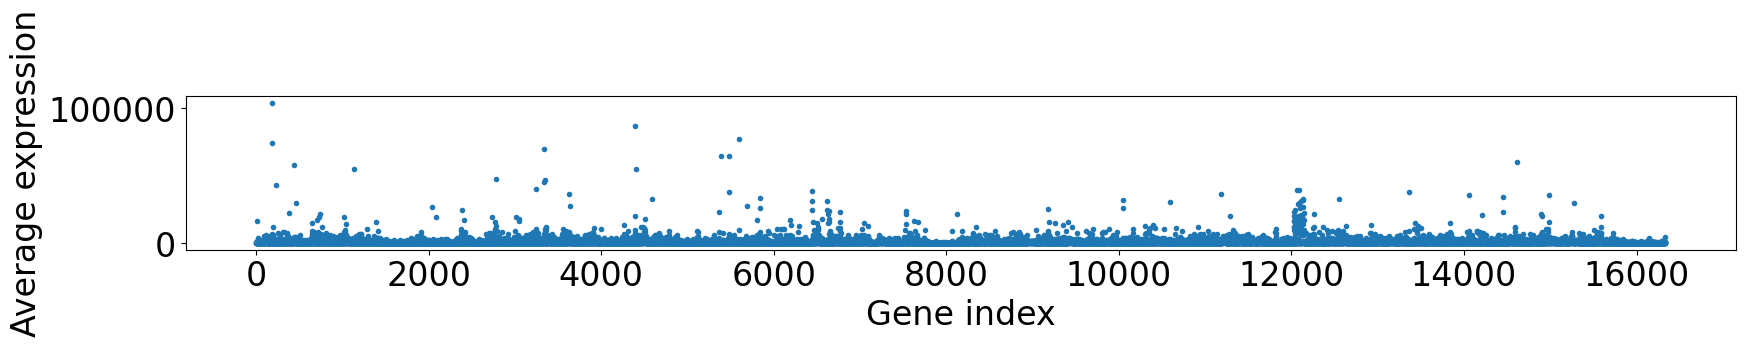

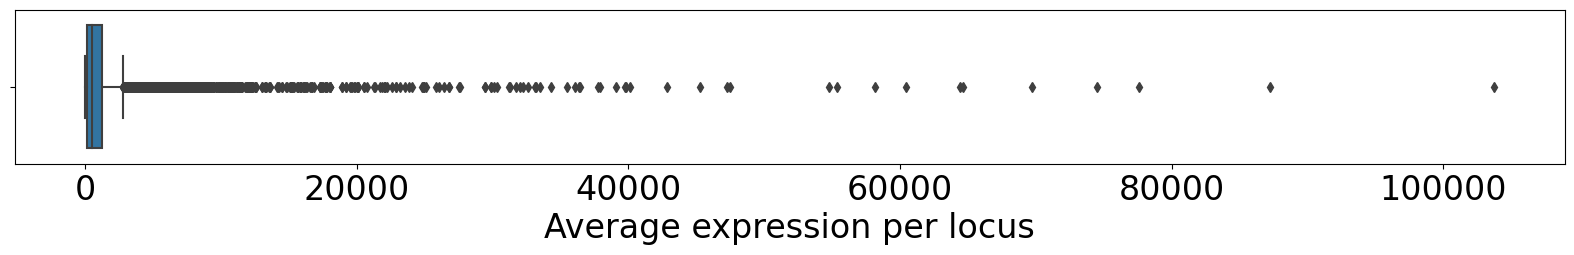

In [32]:
# criteria = 'average', 'median', 'std', 'min', 'max'
plot_stats_on_gene_expression(2**X - 1, criteria='average')

There are 0 genes whose median expression is 0.


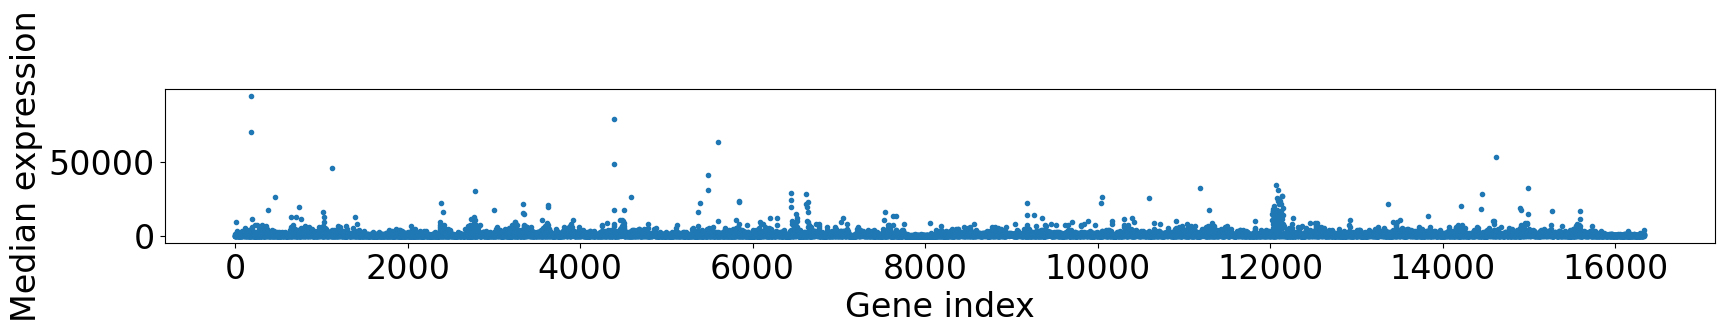

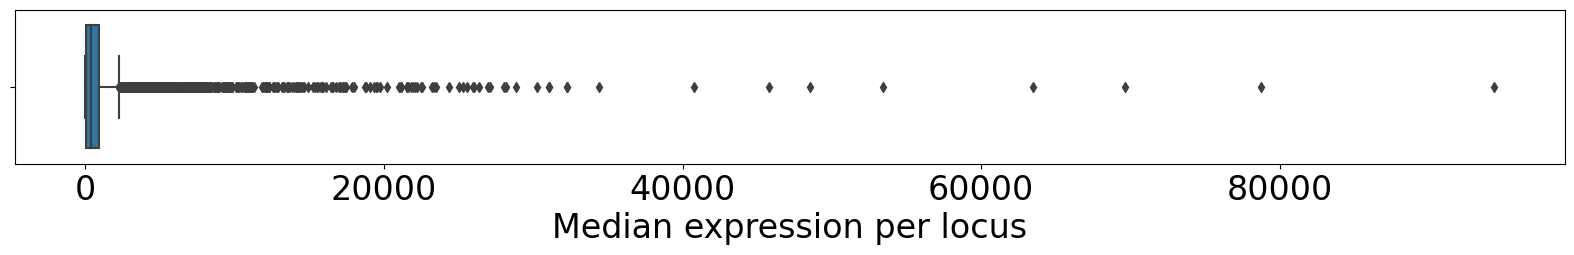

In [33]:
plot_stats_on_gene_expression(2**X - 1, criteria='median')

There are 0 genes whose maximum is 0.


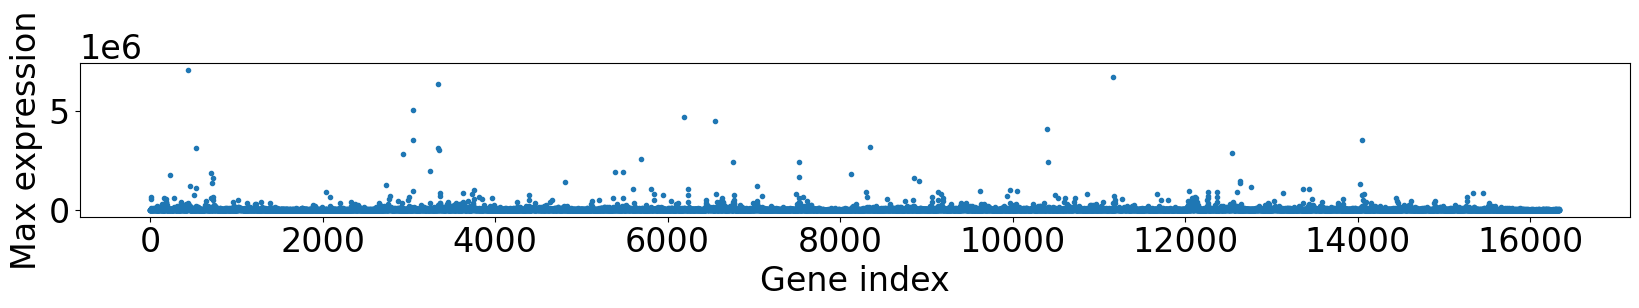

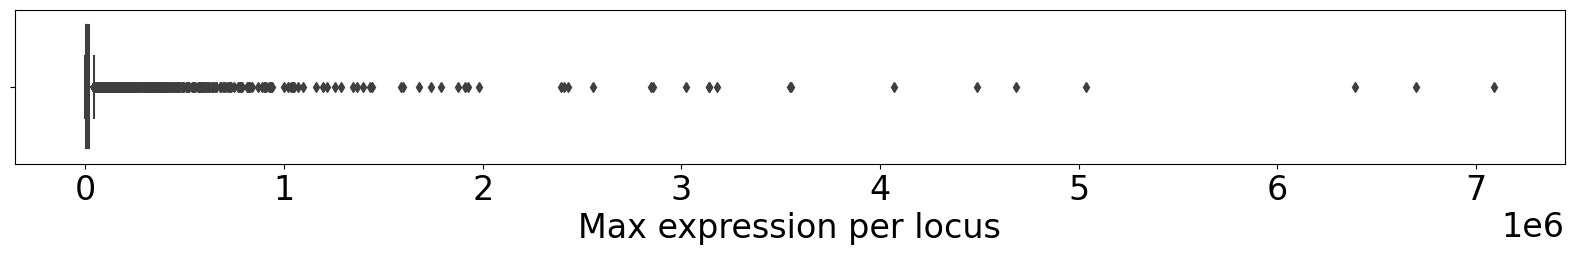

In [34]:
plot_stats_on_gene_expression(2**X - 1, criteria='max')

There are 0 genes whose average expression is 0.


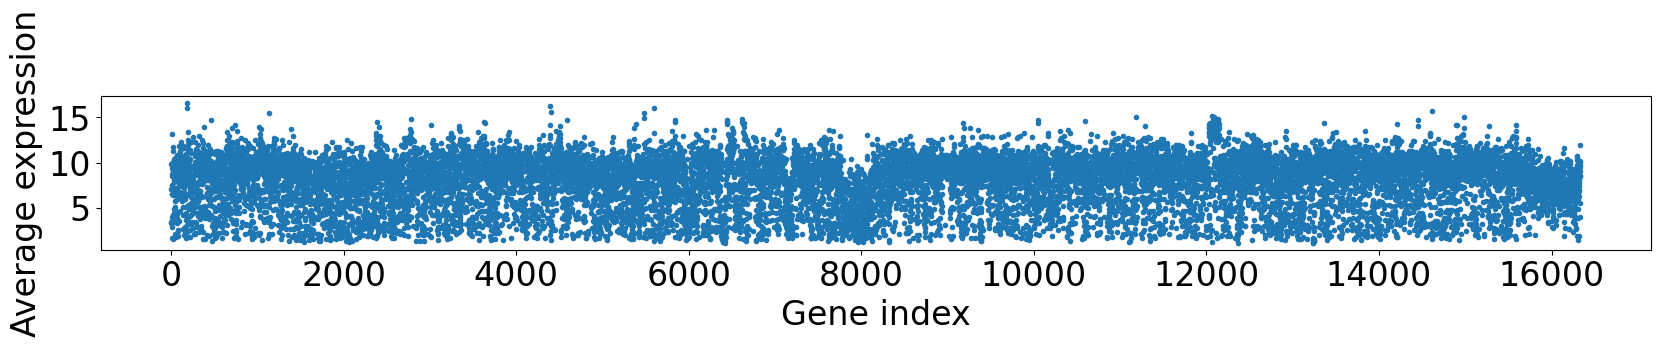

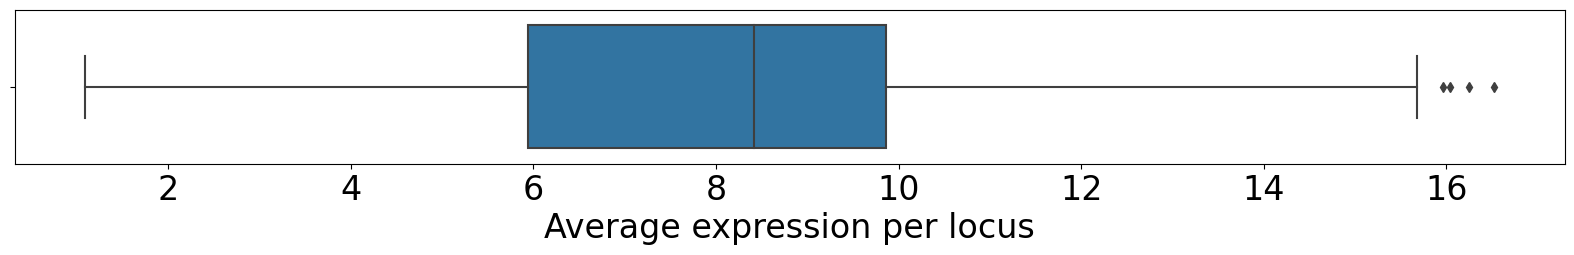

In [35]:
plot_stats_on_gene_expression(X, criteria='average')

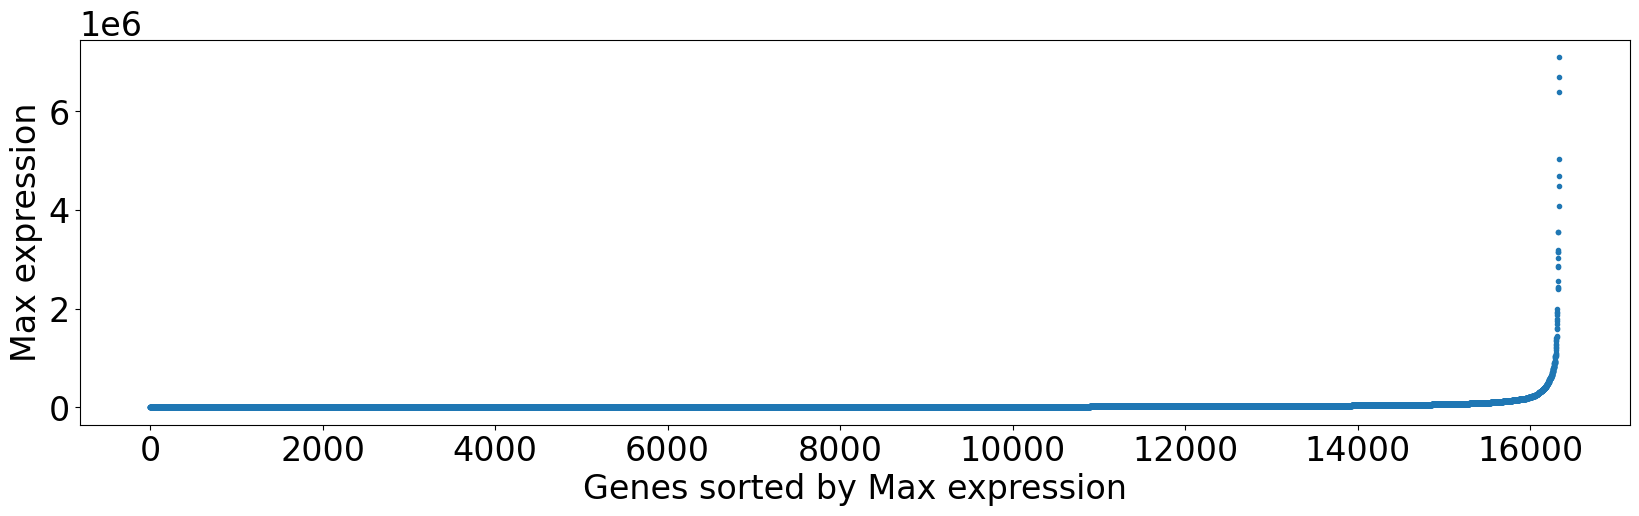

In [42]:
ordered_genes = sort_genes(2**X-1, criteria='max') # 'average', 'median', 'std', 'min', 'max'

# Analysis by class

In [37]:
# Code to find the index of a gene from its name.
# np.argwhere(np.array([gene.split('|')[0] for gene in feat_name]) == 'ACPP')

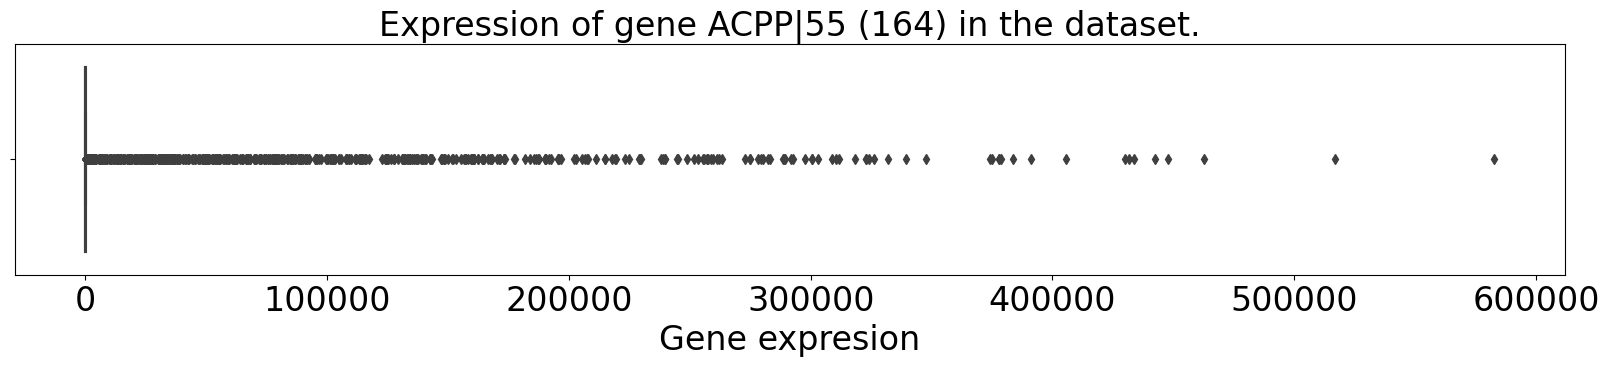

In [43]:
plot_random_gene_expression(2**X - 1, y, feat_name, class_name, group_by_classes=False, gene_index=164)

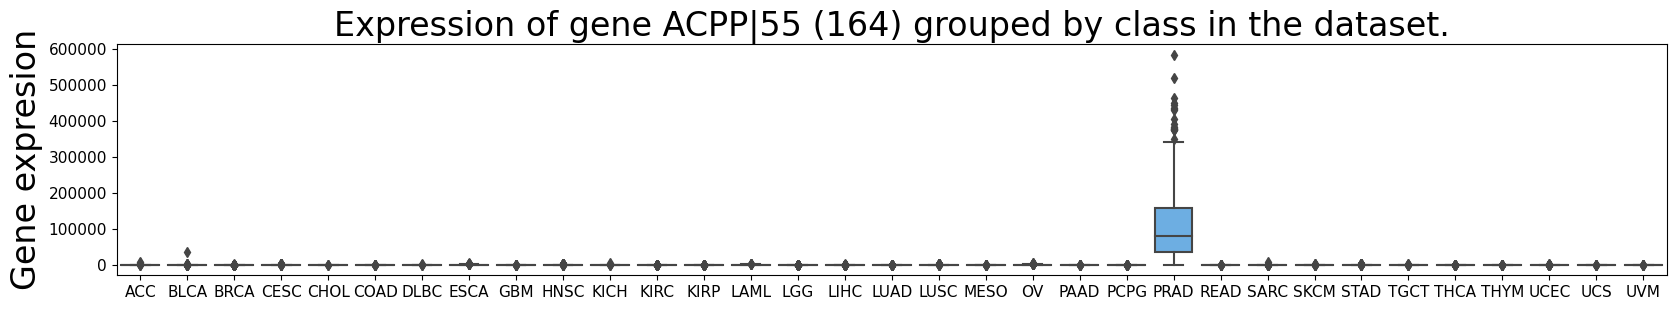

In [44]:
plot_random_gene_expression(2**X - 1, y, feat_name, class_name, group_by_classes=True, gene_index=164)

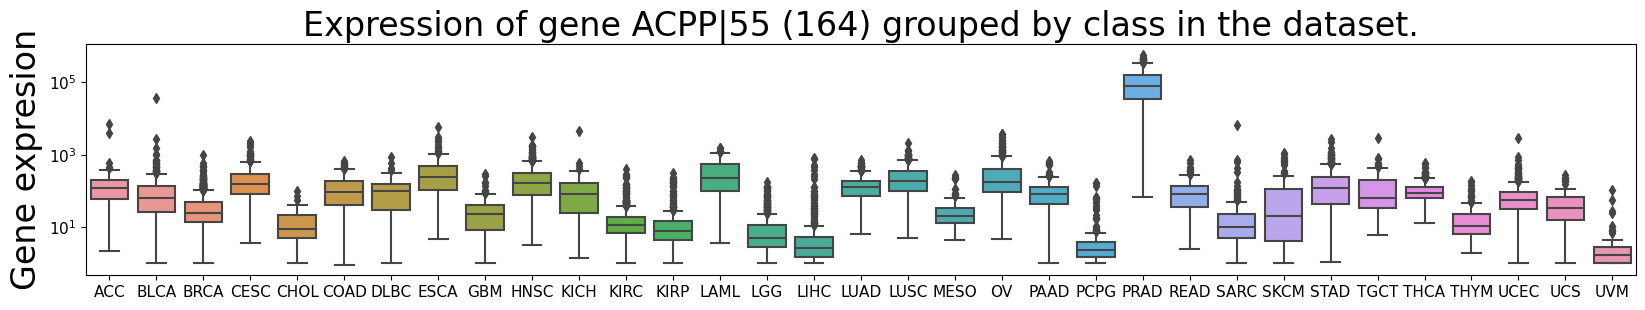

In [45]:
plot_random_gene_expression(2**X - 1, y, feat_name, class_name, group_by_classes=True, log_scale=True, gene_index=164)

# Analysis by sample

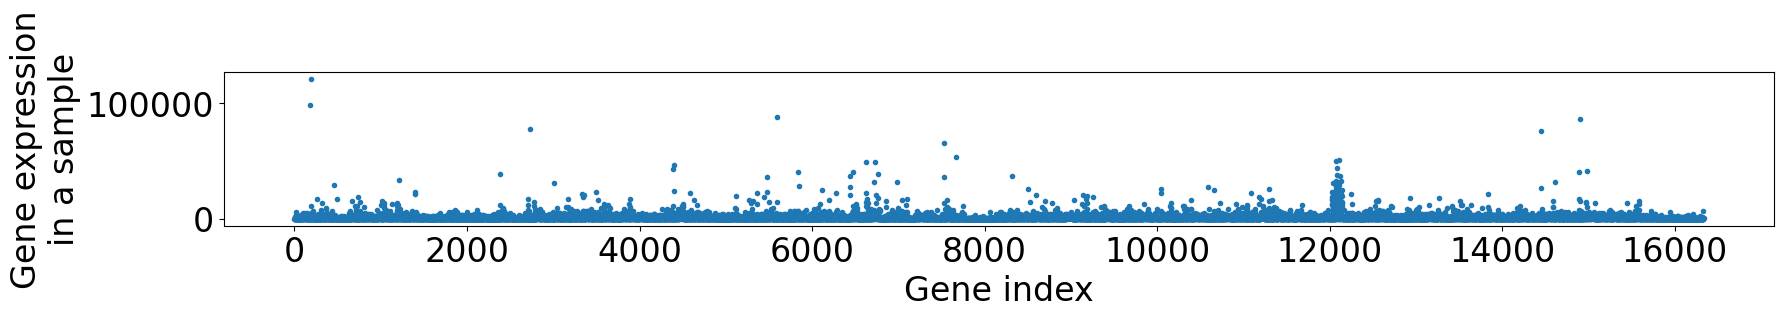

In [46]:
plot_random_sample_expression(2**X - 1)